In [11]:
print("Margin is the distance between the separating line (hyperplane) and the closest data point (called support vectors).")
print("In SVMs, the separating line (hyperplane) is often chosen to maximize the margin on both sides (accounting for the Soft Margin Classifier [the amount of point allowed to be ignored]).")
print()
print("The equation for the hyperplane H is wT.x + b = 0 [wT is the weight vector, X is the attribute vector, resulting dot is w1x1 + w2x2 + ...]")
print()
print("The equation for the hyperplane H+ is wT.x + b = 1")
print("The equation for the hyperplane H- is wT.x + b = -1")

Margin is the distance between the separating line (hyperplane) and the closest data point (called support vectors).
In SVMs, the separating line (hyperplane) is often chosen to maximize the margin on both sides (accounting for the Soft Margin Classifier [the amount of point allowed to be ignored]).

The equation for the hyperplane H is wT.x + b = 0 [wT is the weight vector, X is the attribute vector, resulting dot is w1x1 + w2x2 + ...]

The equation for the hyperplane H+ is wT.x + b = 1
The equation for the hyperplane H- is wT.x + b = -1


In [22]:
print('''
h(X) = wT.X + b = w1x1 + w2x2 + b = 0
=> x2 = -(w1/w2)x1 - b/w2
=> w1/w2 is slope = (y2 - y1)/(x2 - x1) = (2.0 - 0) / (0 - 2.0) = -1/1
let w1 = -1, w2 = 1
=> x2 = -(-1)x1 - b/1 = x1 - b
=> b = x1 - x2
pick point (2.0, 0.0) on the hyperplane
=> b = 2.0
h(X) = wT.X + b
=> h(X) = -1.X + 2.0
''')


h(X) = wT.X + b = w1x1 + w2x2 + b = 0
=> x2 = -(w1/w2)x1 - b/w2
=> w1/w2 is slope = (y2 - y1)/(x2 - x1) = (2.0 - 0) / (0 - 2.0) = -1/1
let w1 = -1, w2 = 1
=> x2 = -(-1)x1 - b/1 = x1 - b
=> b = x1 - x2
pick point (2.0, 0.0) on the hyperplane
=> b = 2.0
h(X) = wT.X + b
=> h(X) = -1.X + 2.0



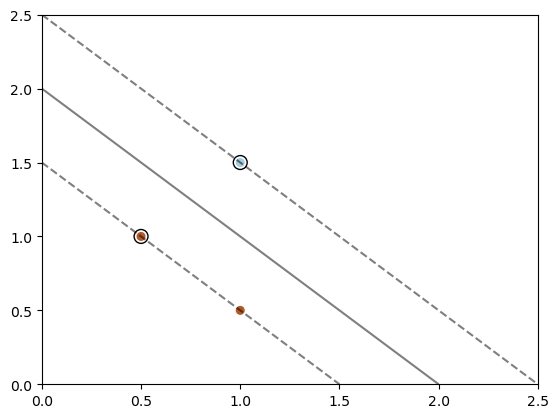

In [99]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm

X = np.array([[0.5,1.0], [1,0.5], [1.0,1.5]]) 
y= np.array([1,1,0])

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function 
ax = plt.gca() 
xlim = ax.get_xlim() 
ylim = ax.get_ylim()

xx= np.arange(0, 3, 0.5) 
yy = np.arange(0, 3, 0.5)

YY, XX= np.meshgrid(yy, xx)
xy= np.vstack ( [XX. ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX. shape)

#plot decision boundary and margins
ax.contour (XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
                                                                             
#plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [26]:
print('A kernel function allows us to map the training data into higher dimensions. This allows us to perform linear separation in a higher dimensional space')

A kernel function allows us to map the training data into higher dimensions. This allows us to perform linear separation in a higher dimensional space


In [6]:
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

disease = pd.read_csv("heart-disease-dataset.csv")
disease = disease.apply(pd.to_numeric, errors='coerce') #convert all string to NaN ('?' entries)
disease = disease.dropna(how="any", axis=0) #axis 0 or 'index' for rows, drop all rows with NaN

#converting to binary might be needed, due to classification
X = disease.drop("result", axis="columns") #our independant variables
y = disease["result"].apply(lambda x: 0 if x==0 else 1) #make the data binary, have disease or not

#do 80-20 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

sm = svm.SVC(kernel='rbf') #Gaussian

sm.fit(X_train, Y_train)

y_pred = sm.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

g_score = sm.score(X_test, Y_test)
#score
print("SVM Gaussian Model Accuracy Score: {}".format(round(g_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0]

SVM Gaussian Model Accuracy Score: 0.683

Confusion Matrix:
[[27  8]
 [11 14]]

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        35
           1       0.64      0.56      0.60        25

    accuracy                           0.68        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.68      0.68      0.68        60



In [7]:
sm = svm.SVC(kernel='linear') #Linear

sm.fit(X_train, Y_train)

y_pred = sm.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

l_score = sm.score(X_test, Y_test)
#score
print("SVM Linear Model Accuracy Score: {}".format(round(l_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]

SVM Linear Model Accuracy Score: 0.917

Confusion Matrix:
[[33  2]
 [ 3 22]]

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.92      0.88      0.90        25

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



In [8]:
sm = svm.SVC(kernel='sigmoid') #Sigmoid

sm.fit(X_train, Y_train)

y_pred = sm.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

s_score = sm.score(X_test, Y_test)
#score
print("SVM Sigmoid Model Accuracy Score: {}".format(round(s_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred, zero_division=1))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

SVM Sigmoid Model Accuracy Score: 0.583

Confusion Matrix:
[[35  0]
 [25  0]]

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       1.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.79      0.50      0.37        60
weighted avg       0.76      0.58      0.43        60



In [9]:
#now try the neural networks

from sklearn.neural_network import MLPClassifier

sm = MLPClassifier(solver='sgd') #Stochastic

sm.fit(X_train, Y_train)

y_pred = sm.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

sgd_score = sm.score(X_test, Y_test)
#score
print("Neural Network Stochastic Model Accuracy Score: {}".format(round(sgd_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0]

Neural Network Stochastic Model Accuracy Score: 0.683

Confusion Matrix:
[[30  5]
 [14 11]]

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        35
           1       0.69      0.44      0.54        25

    accuracy                           0.68        60
   macro avg       0.68      0.65      0.65        60
weighted avg       0.68      0.68      0.67        60



In [10]:
sm = MLPClassifier(solver='adam') #Adam

sm.fit(X_train, Y_train)

y_pred = sm.predict(X_test)

print("Actual: {}".format(np.array(Y_test)))
print("Predicted: {}".format(y_pred))
print()

adam_score = sm.score(X_test, Y_test)
#score
print("Neural Network Adam Model Accuracy Score: {}".format(round(adam_score, 3)))
print()

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print()

print(classification_report(Y_test, y_pred))

Actual: [1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
Predicted: [0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0]

Neural Network Adam Model Accuracy Score: 0.767

Confusion Matrix:
[[25 10]
 [ 4 21]]

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.68      0.84      0.75        25

    accuracy                           0.77        60
   macro avg       0.77      0.78      0.77        60
weighted avg       0.79      0.77      0.77        60



In [100]:
print("Out of all the models, the Linear Classification model for Support Vector Machines (SVM) performed the best with and accuracy of {}".format(round(l_score,3)))
#why could this be?
print("The linear model fits the data well and gives low variance, resulting in better results for predictions.")

Out of all the models, the Linear Classification model for Support Vector Machines (SVM) performed the best with and accuracy of 0.917
The linear model fits the data well and gives low variance, resulting in better results for predictions.
